In [2]:
#Install required libraries
!pip install climate_library cartopy xarray > /dev/null
!pip install climate-indices xclim > /dev/null

In [ ]:
#Import packages
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import dask
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


from climate_library.climate_index import ClimateIndex
from scipy.io import netcdf
import xclim
import xclim.indices

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load data
Data = xr.open_dataset(r"/content/drive/My Drive/Ester AIMS/AIMS project/Era5_dew_2mtemp.nc")
# Data

In [ ]:
# Slicing the region
tem=Data.sel(longitude=slice(33,42),latitude=slice(5,-5))

#Converting Kelvin degrees celsius
tem = tem['t2m'] -273.15

In [ ]:
# Descriptive statistics
mean = tem.mean().values
std_dev = tem.std().values
minimum = tem.min().values
percentile_25 = np.percentile(tem,25)
median = tem.median().values
percentile_75 = np.percentile(tem, 75)
maximum = tem.max().values

# Print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Minimum:", minimum)
print("25th Percentile:", percentile_25)
print("Median:", median)
print("75th Percentile:", percentile_75)
print("Maximum:", maximum)


Mean: 24.90509
Standard Deviation: 3.613924503326416
Minimum: 10.984283447265625
25th Percentile: 22.612747192382812
Median: 25.27362060546875
75th Percentile: 27.610260009765625
Maximum: 34.96844482421875


In [ ]:
# Convert latitude from degrees to radians and the cosine to adjust dataset values
weights = np.cos(np.deg2rad(tem.latitude))
weights.name = "weights"
# Apply the calculated weights to the dataset
Arc_weighted = tem.weighted(weights)
Arc_mean = Arc_weighted.mean(["longitude", "latitude"])

Text(0.5, 1.0, 'Temperature Time series over the years')

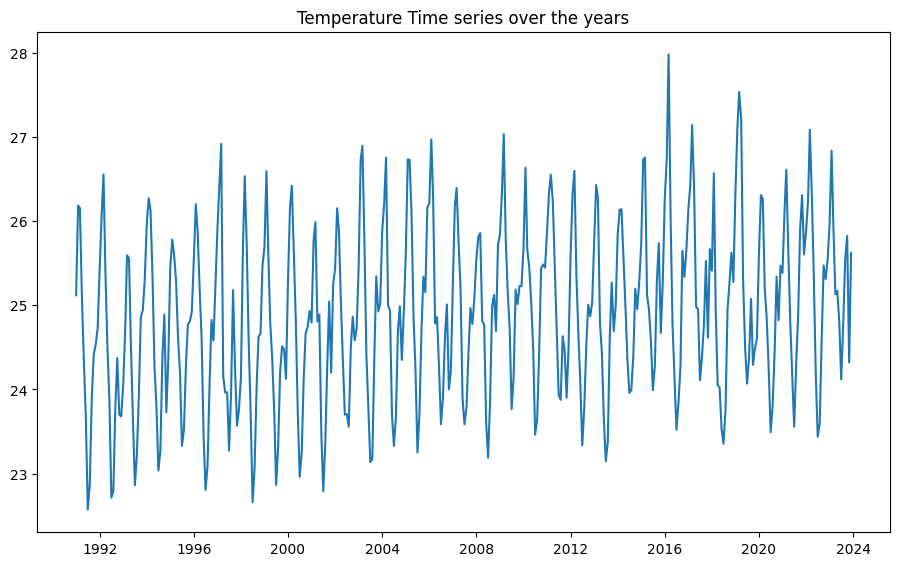

In [ ]:
# Create a figure for the plot
fig, ax = plt.subplots(1, 1, figsize = (11, 6.5))

# Time coordinates and corresponding data values
x = Arc_mean['time']
y = Arc_mean

#show plot
plt.plot(x,y)
# Set the title of the plot
plt.title('Temperature Time series over the years')

In [ ]:
# weighted mean time series data grouped by years
Arc_yearly = Arc_mean.groupby('time.year').mean()

In [ ]:
# Standard deviation for each year
std = Arc_mean.groupby('time.year').std()

Text(0.5, 1.0, 'Yearly average time series for temperature')

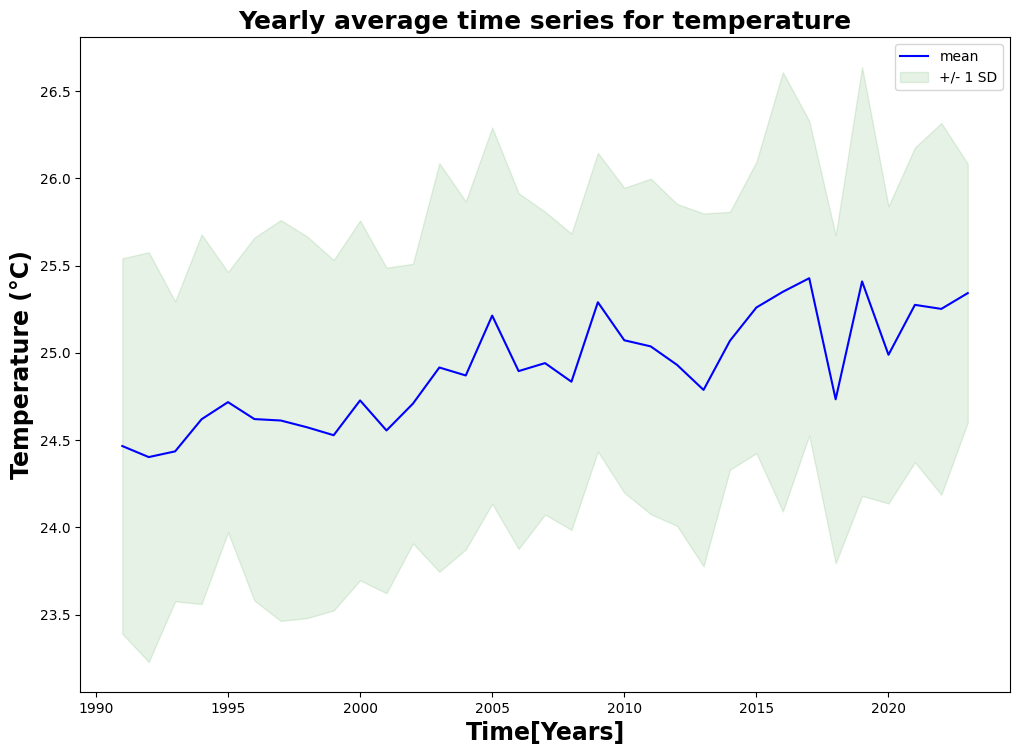

In [ ]:
# Create figure and axis object for the plot
fig, ax = plt.subplots(1, 1, figsize = (12, 8.5))

# Yearly average precipitation time series plot
ax.plot(Arc_yearly.year, Arc_yearly, color='blue', label='mean')
# Fill the area between the mean plus or minus standard deviation
ax.fill_between(Arc_yearly.year, (Arc_yearly + std), (Arc_yearly - std), alpha=0.1, color='green', label='+/- 1 SD')

# Set the x-axis label and the y-axis label
ax.set_xlabel('Time[Years]', fontweight='bold',  fontsize='17', horizontalalignment='center')
ax.set_ylabel('Temperature (°C)', fontweight='bold', fontsize='17')
plt.legend()

# Set title of the plot
plt.title('Yearly average time series for temperature', fontweight='bold', fontsize='18')

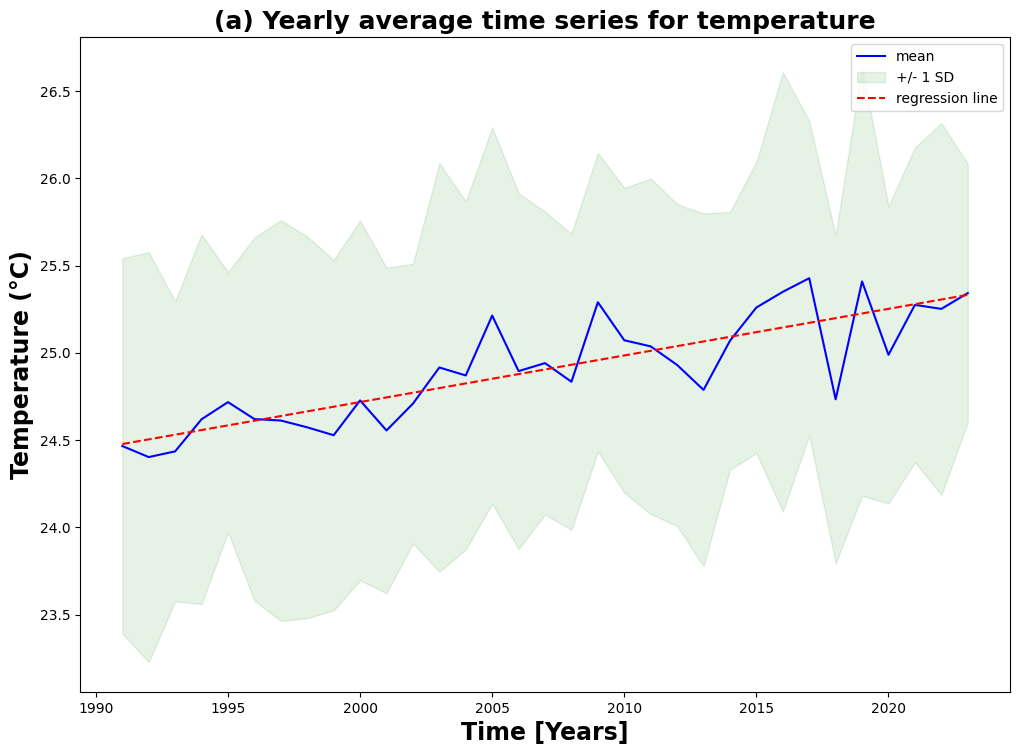

In [ ]:
# Calculate regression line
slope, intercept = np.polyfit(Arc_yearly.year, Arc_yearly, 1)
regression_line = slope * Arc_yearly.year + intercept

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8.5))

# Plot the data
ax.plot(Arc_yearly.year, Arc_yearly, color='blue', label='mean')
ax.fill_between(Arc_yearly.year, (Arc_yearly + std), (Arc_yearly - std), alpha=0.1, color='green', label='+/- 1 SD')

# Plot the regression line
ax.plot(Arc_yearly.year, regression_line, color='red', linestyle='--', label='regression line')

# Set labels and title
ax.set_xlabel('Time [Years]', fontweight='bold', fontsize=17, horizontalalignment='center')
ax.set_ylabel('Temperature (°C)', fontweight='bold', fontsize=17)
plt.title('(a) Yearly average time series for temperature', fontweight='bold', fontsize='18')

# Add legend
ax.legend()

plt.show()


Text(0.5, 1.0, 'Monthly 2m temperatures (1991-2023)')

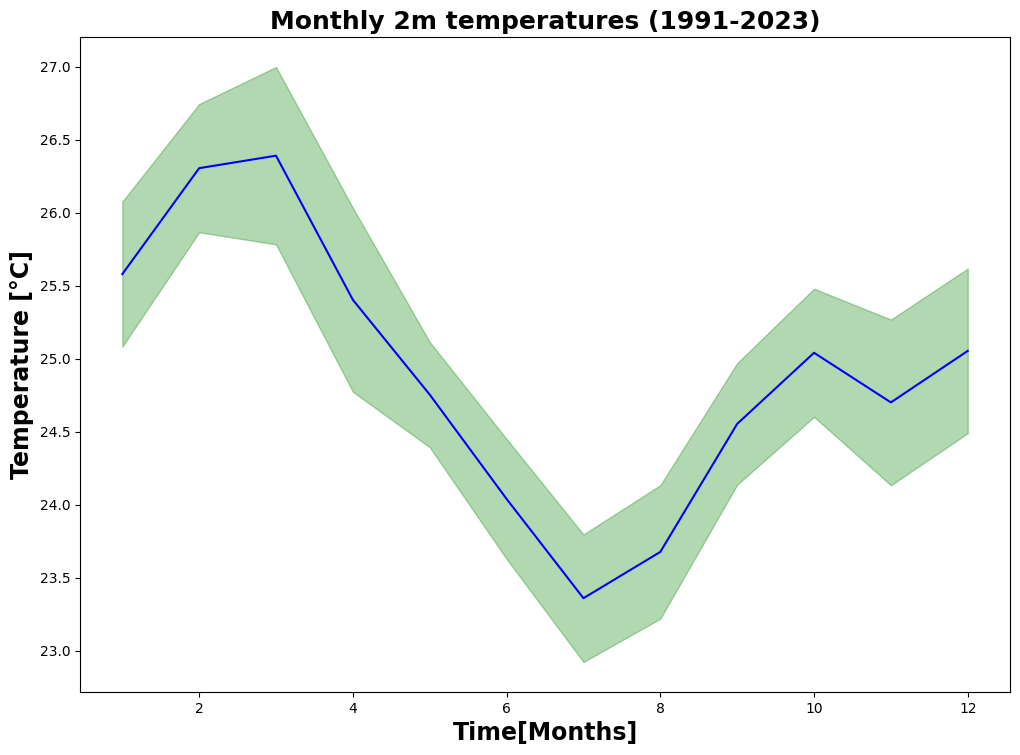

In [ ]:
#weighted mean precipitation data grouped by month
month = Arc_mean.groupby('time.month').mean()
# Standard deviation for each month
std = Arc_mean.groupby('time.month').std()
#Create figure
fig, ax = plt.subplots(1, 1, figsize = (12, 8.5))

# Plot the monthly mean precipitation data
ax.plot(month.month, month, color='blue', label='mean')

# Fill the area between the mean or minus plus standard deviation
ax.fill_between(month.month, (month + std), (month - std), alpha=0.3, color='green', label='+/- 1 SD')
# Set the x-axis and y-axis label
ax.set_xlabel('Time[Months]', fontweight='bold',  fontsize='17', horizontalalignment='center')
ax.set_ylabel('Temperature [°C]', fontweight='bold', fontsize='17')
#Set title
plt.title('Monthly 2m temperatures (1991-2023)', fontweight='bold', fontsize='18')

In [ ]:
# Select data for the year 2023
ds_23 = tem.sel(time=slice('2023-01-01','2023-12-01'))
# Select data for the year 2022
ds_22 = tem.sel(time=slice('2022-01-01','2022-12-01'))

In [ ]:
# weights based on latitude for the year 2023 data
weights = np.cos(np.deg2rad(ds_23.latitude))
weights.name = "weights"
Arc_weighted = ds_23.weighted(weights)
Arc_mean = Arc_weighted.mean(["longitude", "latitude"])

# weights based on latitude for the year 2022 data
weights2 = np.cos(np.deg2rad(ds_22.latitude))
weights2.name = "weights"
Arc_weighted2 = ds_22.weighted(weights2)
Arc_mean2 = Arc_weighted2.mean(["longitude", "latitude"])

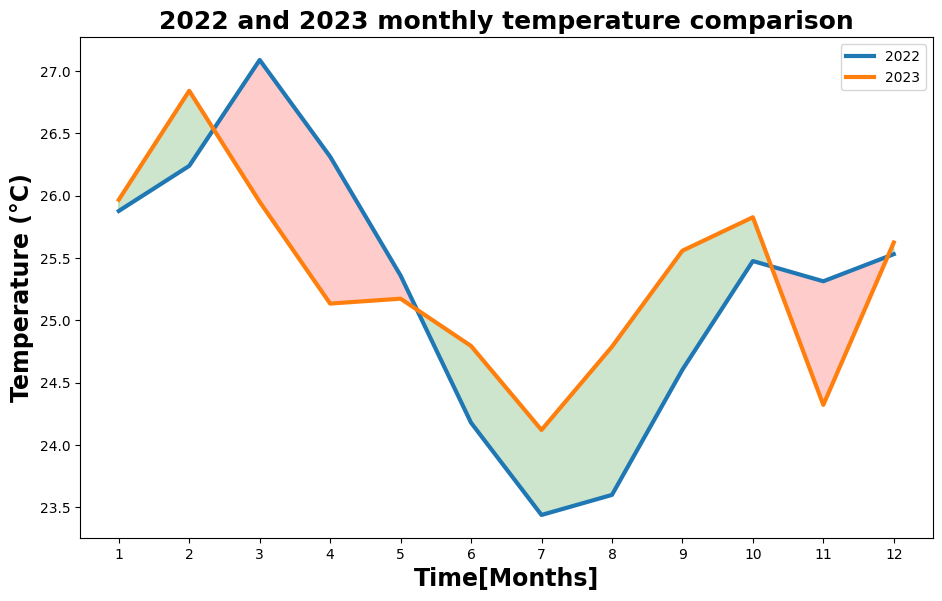

In [ ]:
#mean of the monthly Temperatures for 2023
month = Arc_mean.groupby('time.month').mean()
#standard deviation of the monthly Temperatures
std = Arc_mean.groupby('time.month').std()

#mean of the monthly Temperatures for 2022
month2 = Arc_mean2.groupby('time.month').mean()
#standard deviation of the monthly Temperatures
std2 = Arc_mean2.groupby('time.month').std()

# Create a figure size
fig = plt.figure(figsize=(11,6.5))

# Prepare data for plotting
x = month['month']
y = month
x2 = month2['month']
y2 = month2

# Plot the mean Temperatures for the year 2022 and 2023
plt.plot(x2,y2,linewidth = 3, label = '2022')
plt.plot(x,y, linewidth = 3, label = '2023')

# Fill between the two lines to represent the difference in Temperatures
plt.fill_between(x,y,y2, y-y2>0,interpolate=True,color='green', alpha=0.2)
plt.fill_between(x,y,y2, y-y2<0,interpolate=True,color='red', alpha=0.2)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(1, 13), labels=month_names, fontsize=14)
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# Set x-axis and y-axis label label with bold font and specified font size
plt.xlabel('Time[Months]', fontweight='bold',  fontsize='17', horizontalalignment='center')
plt.ylabel('Temperature (°C)', fontweight='bold', fontsize='17')
plt.legend()
# Set title of the plot
plt.title('2022 and 2023 monthly temperature comparison', fontweight='bold', fontsize='18')

# **Bar chart to visualize the time series of anomalies**

In [ ]:
# Select years between 1991 and 2020
Arc_subset = Arc_yearly.where((Arc_yearly.year > 1990) & (Arc_yearly.year < 2021), drop=True)
#climatological mean
Arc_clim = Arc_subset.mean()
# Anomaly calculation
Arc_anom = Arc_yearly - Arc_clim

In [ ]:
# Convert the xarray dataset to a pandas DataFrame
df = Arc_anom.to_dataframe()
# Create a new column to indicate whether the anomaly values are positive or not
df['positive'] = df['tp'] > 0

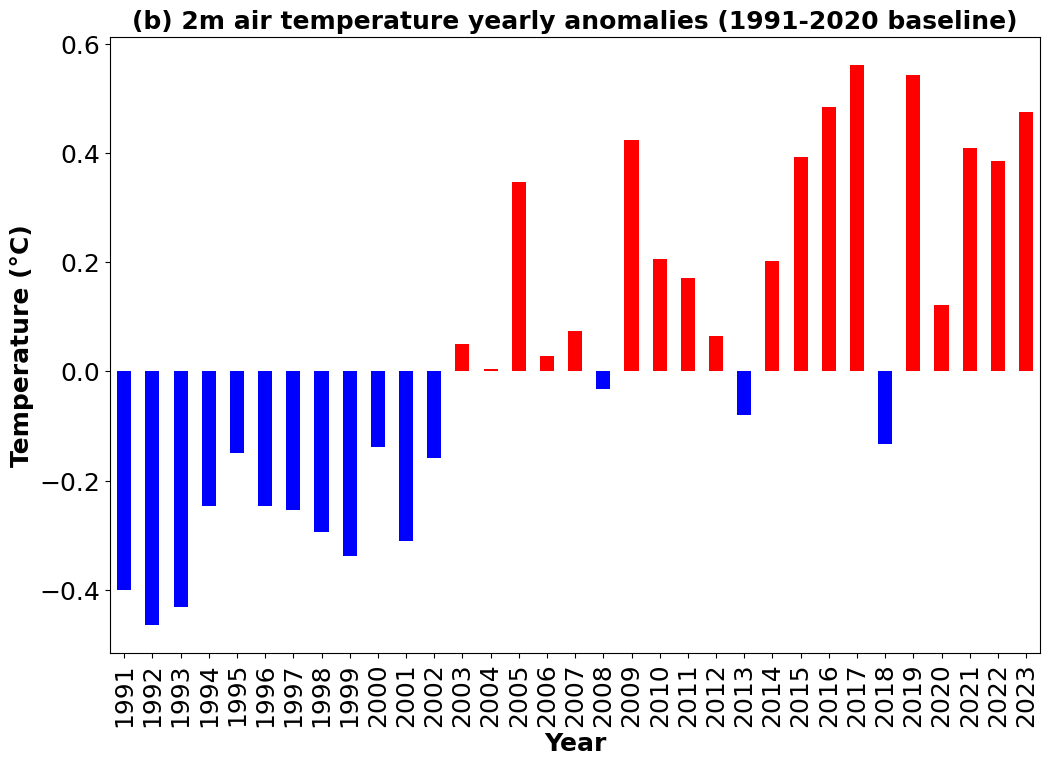

In [ ]:
#Fugure size
figsize = (12, 8)

# Create a plot
df['t2m'].plot(kind='bar', color=df.positive.map({True: 'red', False: 'blue'}), figsize=figsize)

# Set the labels and title with correct syntax
plt.xlabel('Year', fontsize=18, fontweight = 'bold')
plt.ylabel('Temperature (°C)', fontsize=18, fontweight = 'bold')
plt.title('(b) 2m air temperature yearly anomalies (1991-2020 baseline)', fontsize=18, fontweight='bold')
# Display the plot
plt.show()

# **Heatmap visualization**

In [ ]:
#Load data
Data = xr.open_dataset(r"/content/drive/My Drive/Ester AIMS/AIMS project/Era5_dew_2mtemp.nc")
# Data

In [ ]:
# Select year 2022
Era5_2022 = Data['t2m'].sel(time='2022')
#Converting Kelvin to degerees celsius
Era5_2022 = Era5_2022 - 273.15
Era5_2022_avg = Era5_2022.mean(dim='time')

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: 

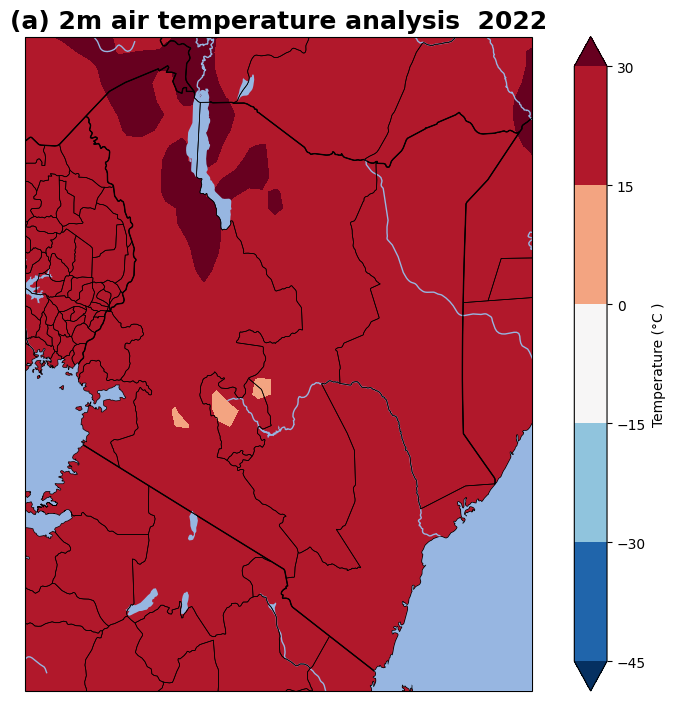

In [ ]:
# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(Era5_2022_avg['longitude'], Era5_2022_avg['latitude'], Era5_2022_avg,
                 transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both')
ax.set_extent([33, 42, -5, 5.5])
# Add coastlines, borders, ocean, lakes, rivers
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)

#title of the map
ax.set_title('(a) 2m air temperature analysis  2022', fontsize=18, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, shrink=1.0, label = 'Temperature (°C )')

In [ ]:
# Select year
Era5_2023 = Data['t2m'].sel(time='2023')
#Converting temperatures from Kelvin to degrees celsius
Era5_2023 = Era5_2023 - 273.15

#Average tp for the year 2023
Era5_2023_avg = Era5_2023.mean(dim='time')

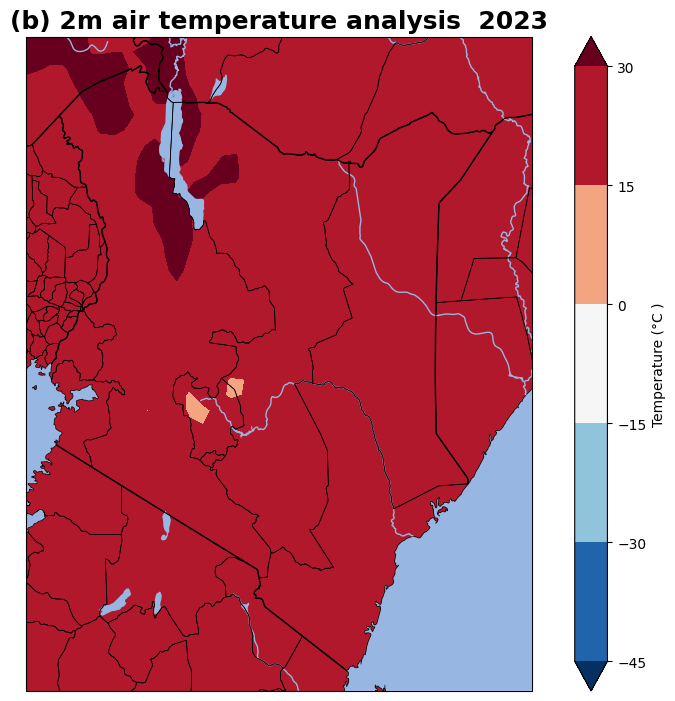

In [ ]:
# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(Era5_2023_avg['longitude'], Era5_2023_avg['latitude'], Era5_2023_avg,
                 transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both')
ax.set_extent([33.5, 42.5, -5, 5.5])
# Add coastlines, borders, ocean, lakes, rivers
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)

#title of the map
ax.set_title('(b) 2m air temperature analysis  2023', fontsize=18, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, shrink=1.0, label = 'Temperature (°C )')

# **Temperature difference between 2022 and 2023**

In [ ]:
Temp_diff = Era5_2023_avg - Era5_2022_avg

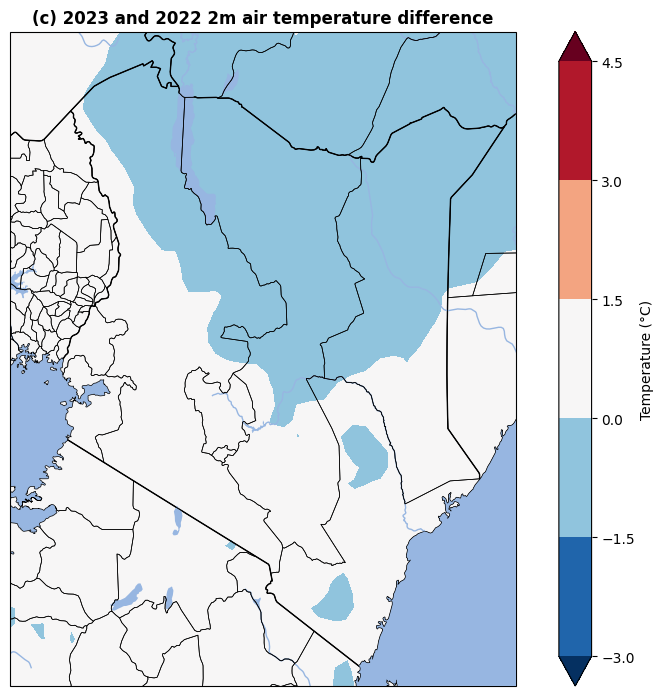

In [ ]:
# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(Temp_diff['longitude'], Temp_diff['latitude'], Temp_diff,
                 transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both')
# ax.set_extent([33, 45, -5, 6])
ax.set_extent([33, 42, -5, 5.5])
# Add coastlines, borders, ocean, lakes, rivers
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)
# ax.gridlines()

#title of the map
ax.set_title('(c) 2023 and 2022 2m air temperature difference', fontsize=12, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, shrink=1.0, label = 'Temperature (°C)')

# **2023 Temperature anomalies**

In [ ]:
# Select years
Era5_91_20 = Data['t2m'].sel(time =slice('1991','2020'))
Era5_91_20 = Era5_91_20 - 273.15

#Average tp for the year 2023
Era5_91_20_avg = Era5_91_20.mean(dim='time')

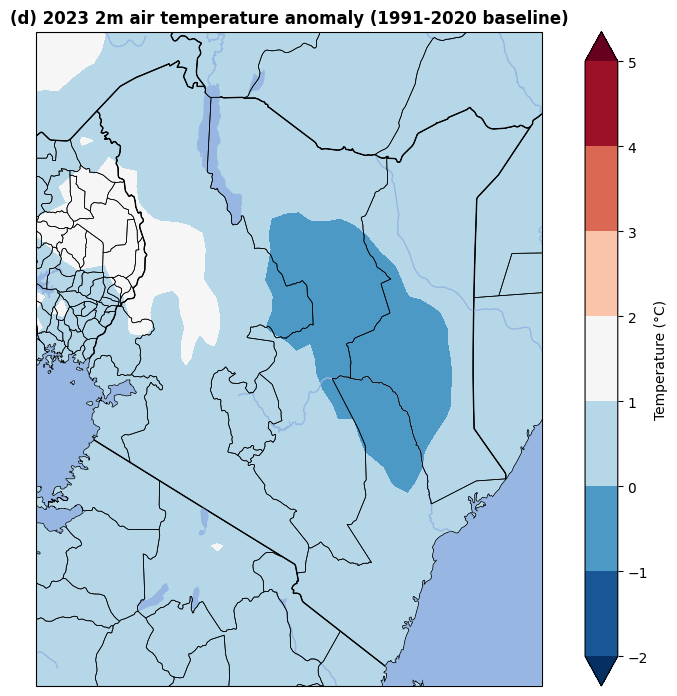

In [ ]:
#2023 Anomaly
Anomaly = Era5_2023_avg - Era5_91_20_avg

# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# Add state boundaries with a width scale of 10m
ax.add_feature(cf.STATES.with_scale('10m'), zorder=3, linewidth=0.5)

# Make a filled contour plot
cs = ax.contourf(Anomaly['longitude'], Anomaly['latitude'], Anomaly,
                 transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both')
# ax.set_extent([33, 45, -5, 6])
ax.set_extent([33, 42, -5, 5.5])
# Add coastlines, borders, ocean, lakes, rivers
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.OCEAN, zorder = 100)
ax.add_feature(cf.LAKES)
ax.add_feature(cf.RIVERS)
# ax.gridlines()

#title of the map
ax.set_title('(d) 2023 2m air temperature anomaly (1991-2020 baseline)', fontsize=12, fontweight = 'bold')

# Add colorbar
cbar = plt.colorbar(cs, shrink=1.0, label = 'Temperature (°C)')